In [1]:
import numpy as np
import cv2
import sys

In [ ]:
src = cv2.imread("./images/airplane.bmp", 1)
mask = cv2.imread("./images/mask_plane.bmp", 0)
dst = cv2.imread("./images/field.bmp", 1)

cv2.copyTo(src, mask, dst)
# dst = cv2.copyTo(src, mask) # 인자로 안주고 return 받으면 결과에 차이가 있음

cv2.imshow("src", src)
cv2.imshow("mask", mask)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
img1 = cv2.imread("./images/cow.png")
img2 = cv2.imread("./images/green.png")
# threshold 해야됨 - grayscale 영상이 필요함
img1gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# 사이즈 같게 만들기
h, w = img1.shape[:2]
img2 = cv2.resize(img2, (h, w), cv2.INTER_AREA)

returnvalue, mask = \
cv2.threshold(img1gray, 240, 255, cv2.THRESH_BINARY_INV)
# THRESH_BINARY_INV = inversion

cv2.copyTo(img1, mask, img2)

cv2.imshow("img1", img1)
cv2.imshow("img2", img2)
cv2.imshow("mask", mask)

cv2.waitKey()
cv2.destroyAllWindows()

### 카메라에 접근

In [2]:
import numpy as np
import cv2
import sys

In [3]:
cap = cv2.VideoCapture(0)
cap.isOpened()

True

In [4]:
if not cap.isOpened():
    print("video open failed")
    sys.exit()
    
# 아래 4가지가 있어야 동영상 저장 가능함
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # return float type
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = round(cap.get(cv2.CAP_PROP_FPS) * 0.8)
fourcc = cv2.VideoWriter_fourcc(*"DIVX")

# 저장 준비
out = cv2.VideoWriter("C:/users/UNIVERSE/Desktop/out.avi", 
                      fourcc, fps, (w, h))
    
while 1:
    ret, frame = cap.read() # ret에 t/f, frame에 영상이 들어옴
    
    if not ret:
        print("video read failed")
        break
        
    edge = cv2.Canny(frame, 50, 150)
    # 엣지 저장하려면 edge를 grayscale로 바꿔야 됨
    
    out.write(frame)
    
    cv2.imshow("frame", frame)
    cv2.imshow("edge", edge)
    
    if cv2.waitKey(30) == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

### 키 이벤트 처리

In [10]:
img = cv2.imread("./fig/cat.bmp", cv2.IMREAD_GRAYSCALE)

cv2.imshow("img", img)

while 1:
    key = cv2.waitKey()
    
    if key == 27:
        break
    elif key == ord("i"):
        img = ~ img
        cv2.imshow("img", img)
    elif key == ord("e"):
        img = cv2.Canny(img, 50, 150)
        cv2.imshow("img", img)

cv2.destroyAllWindows()

### 마우스 이벤트 처리

In [1]:
import numpy as np
import cv2
import sys

In [4]:
oldx, oldy = -1, -1

def call_mouse(event, x, y, flags, params):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
#         print(x, y)
#     elif event == cv2.EVENT_LBUTTONUP:
#         print(x, y)
    elif event == cv2.EVENT_MOUSEMOVE: # 움직이면
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 0),
                    4, cv2.LINE_AA)
            cv2.imshow("img", img)
            oldx, oldy = x, y
            
img = np.ones((480, 480, 3), np.uint8) * 255

while 1:
    # 네임드 윈도우를 띄우고 
    cv2.namedWindow("img")
    # img창에, call_mouse함수 쓰고, img에 그리기
    cv2.setMouseCallback("img", call_mouse, img)
    cv2.imshow("img", img)
    
    if cv2.waitKey() == 27:
        break
    elif cv2.waitKey() == ord("s"):
        cv2.imwrite("./fig/signature.bmp", img)

cv2.waitKey()
cv2.destroyAllWindows()

### 트랙바

In [1]:
import numpy as np
import cv2
import sys

In [22]:
def call_trackbar(pos):
#    print(pos)
    alpha = pos / 100
    img = cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)
    cv2.imshow("img", img)

# img = np.zeros((480, 640), np.uint8)
img1 = cv2.imread("./fig/cap2.PNG", cv2.IMREAD_UNCHANGED)
img2 = cv2.imread("./fig/cap1.PNG", cv2.IMREAD_UNCHANGED)

cv2.namedWindow("img")

# createTrackbar(trackbarName, windowName, value, count, onChange) -> None
# trackbarName: 트랙바 이름
# windowName : 트랙바를 생성할 창 이름
# value : 트랙바 위치 초기값
# count : 트랙바 최댓값, 최솟값은 0
# onChange :callback 함수 e.g., onChange(pos) 위치를 정수형태로 전달
cv2.imshow("img", img)
cv2.createTrackbar("level", "img", 0, 100, call_trackbar)

cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
def call_trackbar1(pos):
    img_glass[mask > 0] = pos
    cv2.imshow("image", img_glass)
    
img_alpha = cv2.imread("./images/imgbin_sunglasses_1.png", cv2.IMREAD_UNCHANGED)
img_glass = img_alpha[:, :, 3]
mask = img_alpha[:, :, -1]

cv2.namedWindow("image")
cv2.createTrackbar("level", "image", 0, 255, call_trackbar1)

cv2.waitKey()
cv2.destroyAllWindows()

### 화소처리의 산술연산

In [36]:
src = cv2.imread("./fig/lenna.bmp", 1)
print(type(src))

<class 'numpy.ndarray'>


In [39]:
dst = src + 100 # 255 넘어서 0이 돼버림
dst1 = cv2.add(src, 100) # clipping 해줌
dst2 = np.clip(src + 100, 0, 255).astype(np.uint8) 
# astype 안하면 return이 float임
dst3 = cv2.add(src, 100) # 컬러 이미지면 blue만 증가함
dst4 = cv2.add(src, (100, 100, 100, 0)) # 마지막 0은 알파채널

cv2.imshow("image", src)
cv2.imshow("image1", dst1)
cv2.imshow("image2", dst2)
cv2.imshow("image3", dst3)
cv2.imshow("image4", dst4)

cv2.waitKey()
cv2.destroyAllWindows()

### matplotlib을 이용한 산술연산

In [40]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

In [57]:
src1 = cv2.imread("./fig/lenna256.bmp", cv2.IMREAD_GRAYSCALE)
src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)
# src3 = np.zeros_like("./fig/lenna.bmp", np.uint8)

dst1 = cv2.add(src1, src2, dtype = cv2.CV_8U)
# addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) -> dst
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
# subtract(src1, src2[, dst[, mask[, dtype]]]) -> dst
dst3 = cv2.subtract(src1, src2)
# absdiff(src1, src2[, dst]) -> dst
dst4 = cv2.absdiff(src1, src2)

cv2.imshow("src1", src1)
cv2.imshow("src2", src2)
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)

cv2.waitKey()
cv2.destroyAllWindows()

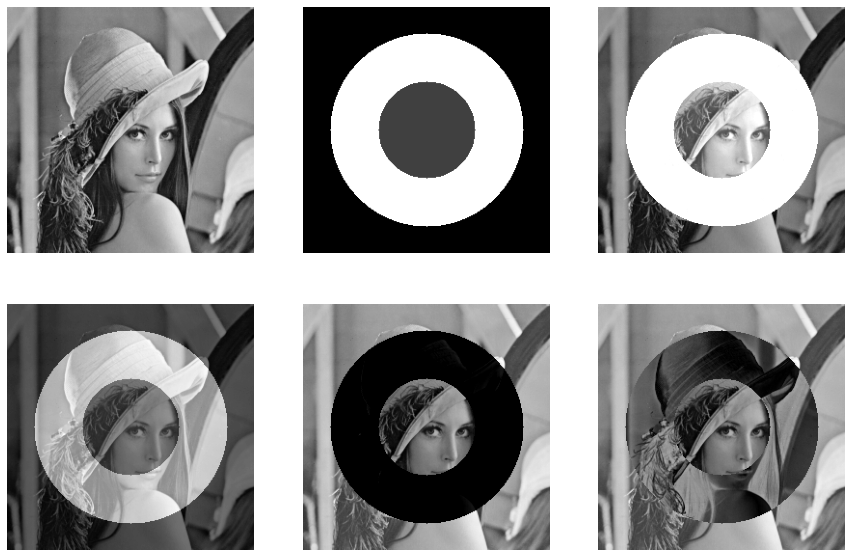

In [58]:
plt.figure(figsize = (15, 10))
plt.subplot(231), plt.imshow(src1, "gray"), plt.axis("off")
plt.subplot(232), plt.imshow(src2, "gray"), plt.axis("off")
plt.subplot(233), plt.imshow(dst1, "gray"), plt.axis("off")
plt.subplot(234), plt.imshow(dst2, "gray"), plt.axis("off")
plt.subplot(235), plt.imshow(dst3, "gray"), plt.axis("off")
plt.subplot(236), plt.imshow(dst4, "gray"), plt.axis("off")

plt.show()

In [65]:
src1 = np.zeros((256, 256), np.uint8)
cv2.rectangle(src1, (10, 10), (127, 248), 255, -1)

src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128, 128), 100, 255, -1)

cv2.imshow("src1", src1)
cv2.imshow("src2", src2)

cv2.waitKey()
cv2.destroyAllWindows()

In [71]:
src1 = np.zeros((256, 256), dtype = np.uint8)
cv2.rectangle(src1, (10, 10), (127, 248), 255, -1) 

src2 = np.zeros((256, 256), dtype = np.uint8)
cv2.circle(src2, (128, 128), 100, 255, -1)

dst_and = cv2.bitwise_and(src1, src2)
dst_or = cv2.bitwise_or(src1, src2)
dst_xor = cv2.bitwise_xor(src1, src2)
dst_not = cv2.bitwise_not(src2)

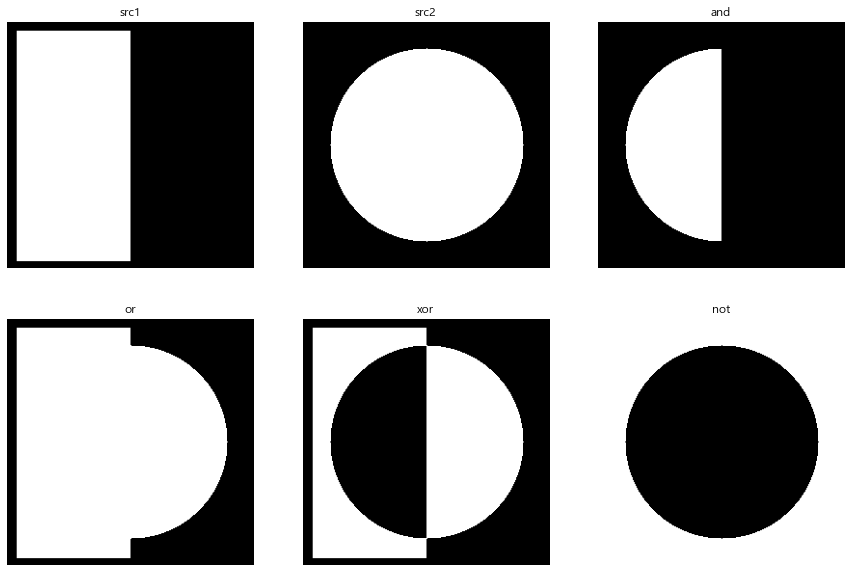

In [72]:
plt.figure(figsize = (15, 10))

plt.subplot(231), plt.axis("off"), 
plt.imshow(src1, "gray"), plt.title("src1")
plt.subplot(232), plt.axis("off"), 
plt.imshow(src2, "gray"), plt.title("src2")
plt.subplot(233), plt.axis("off"), 
plt.imshow(dst_bit_and, "gray"), plt.title("and")
plt.subplot(234), plt.axis("off"), 
plt.imshow(dst_bit_or, "gray"), plt.title("or")
plt.subplot(235), plt.axis("off"), 
plt.imshow(dst_bit_xor, "gray"), plt.title("xor")
plt.subplot(236), plt.axis("off"), 
plt.imshow(dst_bit_not, "gray"), plt.title("not")

plt.show()

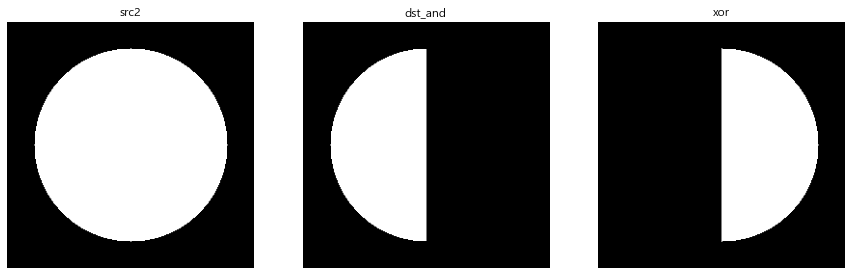

In [80]:
plt.figure(figsize = (15, 10))

xor = cv2.bitwise_xor(src2, dst_and)

plt.subplot(231), plt.imshow(src2, "gray")
plt.axis("off"), plt.title("src2")
plt.subplot(232), plt.imshow(dst_and, "gray")
plt.axis("off"), plt.title("dst_and")
plt.subplot(233), plt.imshow(xor, "gray")
plt.axis("off"), plt.title("xor")

plt.show()